In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
#Read data
data = pd.read_csv("train.csv", sep = ";")

In [23]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [24]:
### Preprocessing Data

In [25]:
#Check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [26]:
#Change Type to bit
data.type = data.type.apply(lambda x : x.replace("white","1"))
data.type = data.type.apply(lambda x : x.replace("red","0"))

In [27]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,1
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,0
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,0
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,1
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,1


In [28]:
white_wine_data = data[data.type == '1']

In [29]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,1
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,1
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,1
5,7.6,0.3,0.52,13.2,0.042,61,148,0.9984,2.98,0.47,9.1,6,1
6,6.4,0.3,0.40,6.2,0.040,46,169,0.9953,3.15,0.46,9.3,6,1


In [ ]:
red_wine_data = data[data.type == '0']

In [ ]:
white_wine_data.head()

In [10]:
#correlation
correlation_white = white_wine_data.corr()

<AxesSubplot:>

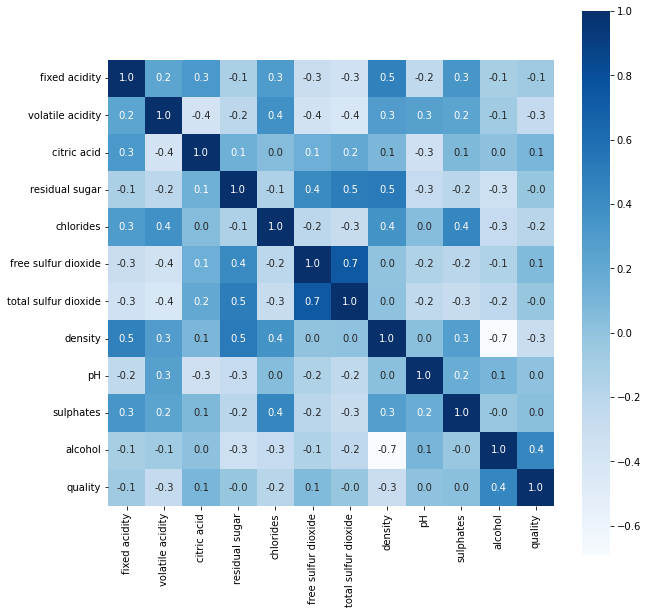

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_white, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Blues')

In [ ]:
correlation_red = red_wine_data.corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_red, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Blues')

In [12]:
#selection data
x = data.drop('quality',axis=1)
y = data['quality']

In [13]:
#read data to test
test = pd.read_csv("test.csv", sep = ";")

In [22]:
#Change Type to bit
test.type = test.type.apply(lambda x : x.replace("white","1"))
test.type = test.type.apply(lambda x : x.replace("red","0"))

In [24]:
#selection data
idt = test['id']
xt = test.drop('id',axis = 1)

In [25]:
# Split data to train and test
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid= train_test_split(x,y,train_size =0.85,test_size=0.15,random_state = 0)

In [26]:
### Training model

In [27]:
#model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1)

In [28]:
#fit training data
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [29]:
#test model
y_dt_predict = dt_model.predict(xt)

In [30]:
df_r = pd.DataFrame({'id':idt,'quality':y_dt_predict})

In [32]:
df_r.to_csv("sm.csv",index=False)

In [ ]:
#pd.DataFrame({'y':y_valid,'y_predict':y_dt_predict})

In [ ]:
#print result


In [33]:
#model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state = 1)

In [34]:
#fit training data
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [35]:
#test model
y_rf_predict = rf_model.predict(xt)

In [36]:
#print result
df_r = pd.DataFrame({'id':idt,'quality':y_rf_predict})
df_r.to_csv("sm_rf.csv",index=False)